In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 15, 6
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from pandas import Series

In [3]:
data = pd.read_csv('tatavg.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)
print (data.size)

          Date  Average Price
0  01-Jan-2018         430.49
1  02-Jan-2018         433.41
2  03-Jan-2018         435.06
3  04-Jan-2018         429.56
4  05-Jan-2018         432.92

 Data Types:
Date              object
Average Price    float64
dtype: object
494


In [4]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('tatavg.csv', parse_dates=['Date'], index_col='Date')#,date_parser=dateparse)
print (data.head())
print(data.size)

            Average Price
Date                     
2018-01-01         430.49
2018-01-02         433.41
2018-01-03         435.06
2018-01-04         429.56
2018-01-05         432.92
247


In [5]:
data.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)

In [6]:
#Converting to time series
ts = data['Average Price']
print(ts.head())
print(ts.size)
split = len(ts) - 47
print(split)

Date
2018-01-01    430.49
2018-01-02    433.41
2018-01-03    435.06
2018-01-04    429.56
2018-01-05    432.92
Name: Average Price, dtype: float64
247
200


In [7]:
train , test = ts[0:split] , ts[split:]
print(test.head())
print(train.size)
print(test.tail())
print(test.size)

Date
2018-10-24    171.03
2018-10-25    166.60
2018-10-26    169.70
2018-10-29    173.61
2018-10-30    178.54
Name: Average Price, dtype: float64
200
Date
2018-12-26    169.98
2018-12-27    169.87
2018-12-28    171.15
2018-12-31    172.80
2019-01-01    172.71
Name: Average Price, dtype: float64
47


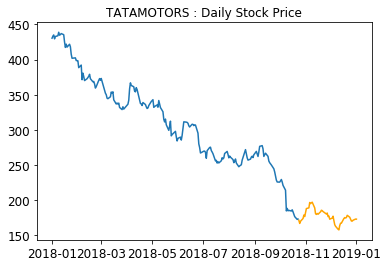

In [8]:
#train.plot(label = 'Training Data')
#test.plot(label = 'Testing Data', color = 'red')
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Testing Data', color='orange')
plt.title('TATAMOTORS : Daily Stock Price')
plt.show()

In [24]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


In [29]:
train.to_csv('dataset.csv')
test.to_csv('validation.csv')

In [30]:
# load dataset
series = Series.from_csv('dataset.csv', header=None)
print(series.dtype)

float64


/usr/local/lib/python3.5/dist-packages/pandas/core/series.py:3726: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [45]:
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X)
#print(differenced.dtype)
print(len(differenced))
#print(differenced)
#print(X.dtype)
#print(X)

199


In [54]:
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 172.055927
Day 2: 170.692498
Day 3: 169.893003
Day 4: 168.920747
Day 5: 167.209297
Day 6: 165.329673
Day 7: 164.096863


In [55]:
print(forecast)
inforecast = []
for i in range(len(forecast)) :
    inverted = inverse_difference(inforecast, i)
    inforecast.append(inverted)
    
print(inforecast)

[-0.71407296 -1.36342954 -0.79949465 -0.97225557 -1.71145032 -1.87962359
 -1.23280996]


IndexError: list index out of range

In [11]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# fit model
model = ARIMA(train, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          Average Price   No. Observations:                  200
Model:                     ARMA(7, 1)   Log Likelihood                -646.277
Method:                       css-mle   S.D. of innovations              6.035
Date:                Mon, 06 May 2019   AIC                           1312.553
Time:                        14:02:47   BIC                           1345.537
Sample:                             0   HQIC                          1325.901
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 303.2574    104.690      2.897      0.004      98.068     508.446
ar.L1.Average Price     0.5155      0.314      1.644      0.102      -0.099       1.130
ar.L2.Average Pr

In [12]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [22]:
print('Forecast: %f' % forecast)
print(len(test))

Forecast: 173.600577
47


In [23]:
#start_index = '2018-10-24'
#end_index = '2019-01-01'
start_index = len(test-46)
end_index = len(test)
forecast1 = test.copy()
#forecast1 = model_fit.predict(start='2018-10-24', end='2019-01-01')
#print(forecast1)
fit1 = sm.tsa.statespace.SARIMAX(train, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
forecast1 = fit1.predict(start=start_index, end=end_index, dynamic=True)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [141]:
print(forecast1.dtype)

float64


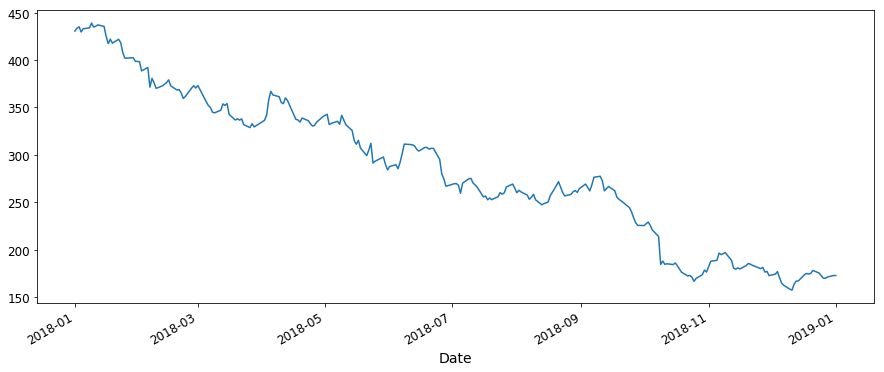

In [85]:
ts.plot()

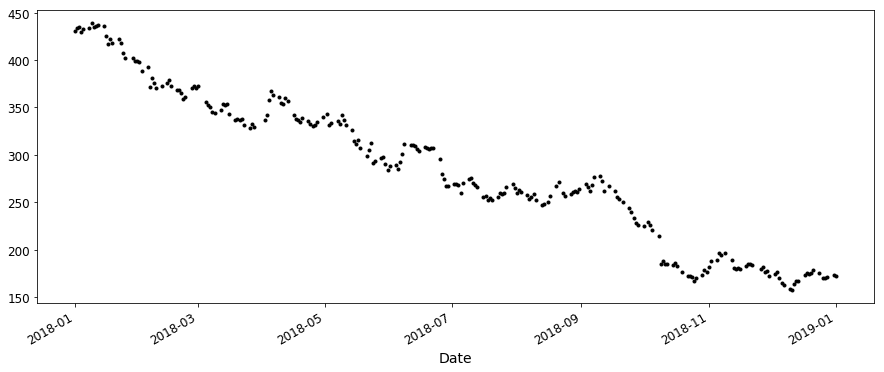

In [86]:
#Visualizing our time series data
ts.plot(style='k.')
plt.show()

In [87]:
#Checking the stationarity of the time series data, techniques are - 
#1) Rolling statistics 
#2) Dickey-Fuller Test
#Clearly there is an increasing trend: taking the Rolling Statistics technique
from statsmodels.tsa.stattools import adfuller

#Creating a function for stationarity check

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    #print ('Results of Dickey-Fuller Test:')
    #dftest = adfuller(timeseries, autolag='AIC')
    #dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    #for key,value in dftest[4].items():
     #   dfoutput['Critical Value (%s)'%key] = value
    #print (dfoutput)
    
#The function ends here

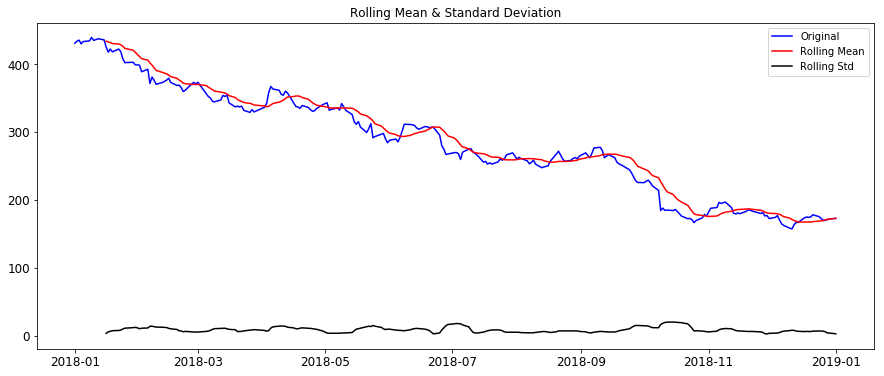

In [88]:
#Calling the function for checking stationarity
test_stationarity(ts)

Date
2018-01-01        NaN
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
2018-01-08        NaN
2018-01-09        NaN
2018-01-10        NaN
2018-01-11        NaN
2018-01-12        NaN
2018-01-15        NaN
2018-01-16   -0.01988
Name: Average Price, dtype: float64

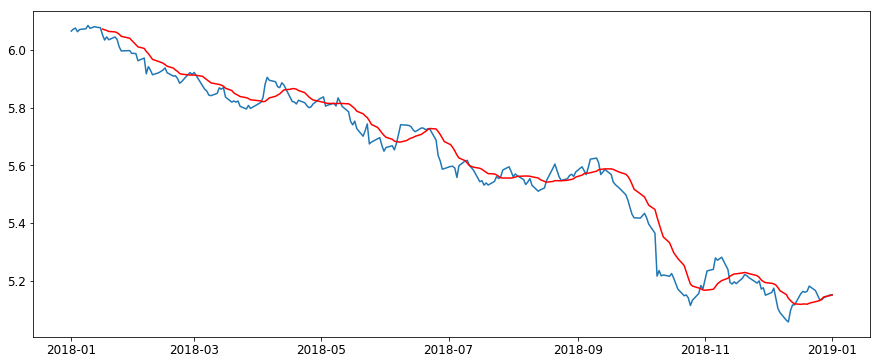

In [89]:
#Making the time series stationary by removing:
#1. Trend and 2. Stationarity
#1. Removing trend : Taking log transform and applying smoothing-moving average
ts_log = np.log(ts)
#Plot after log transform
#plt.plot(ts_log)    
#plotting log transform and moving average together
moving_avg = ts_log.rolling(window=12, center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
#Taking difference from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

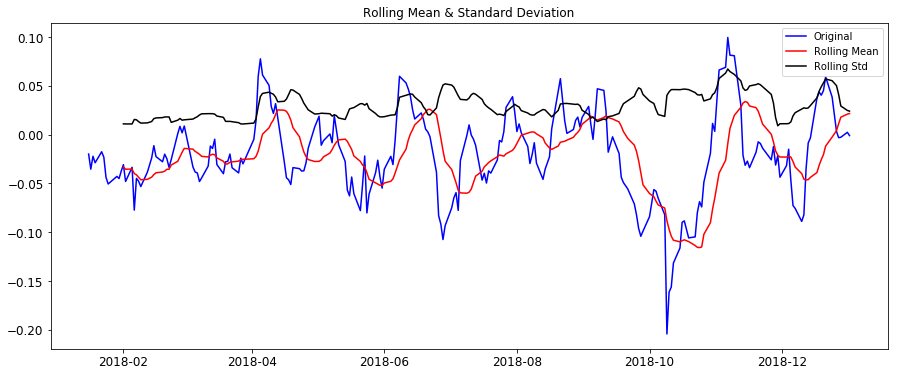

In [90]:
#Dropping the NaN values
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

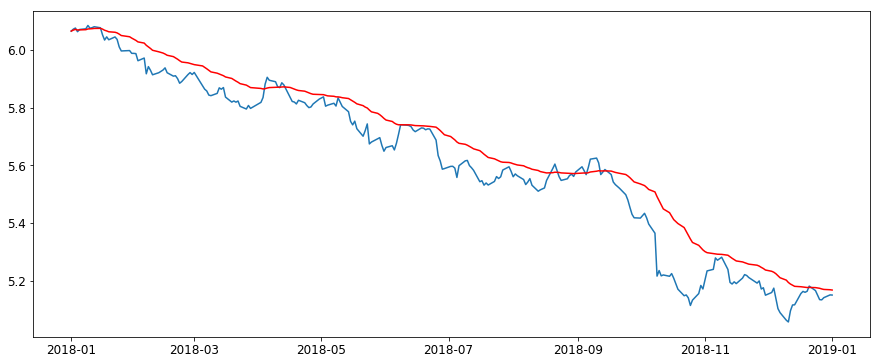

In [91]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
#expwighted_avg = ts_log.ewma(ups, span=RSI_N)[-1]
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

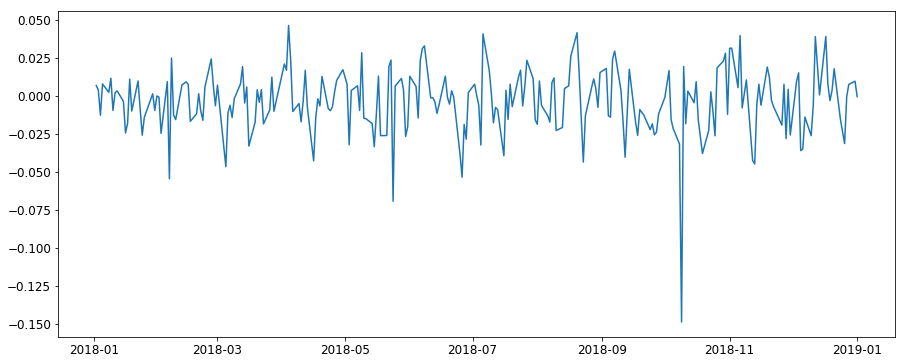

In [92]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

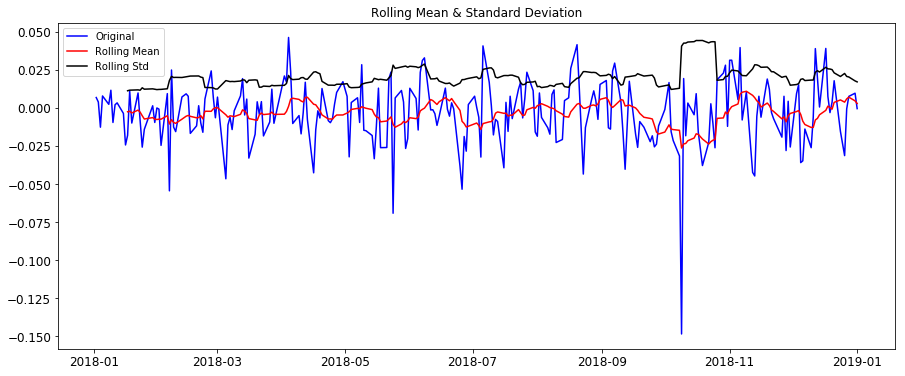

In [93]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1079')

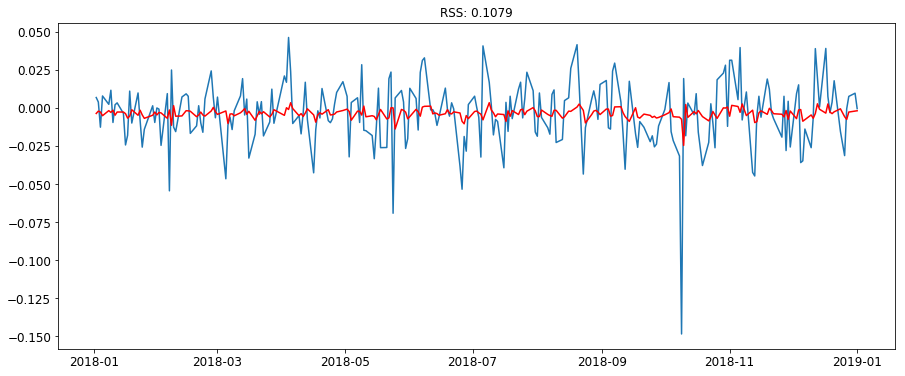

In [94]:
#AR MODEL
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1079')

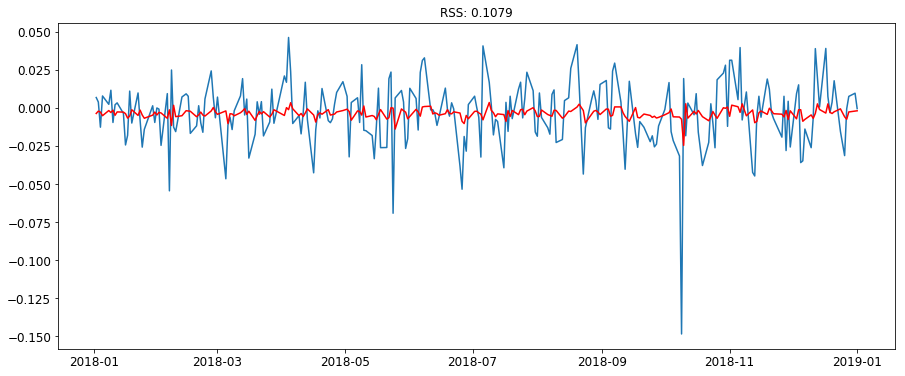

In [95]:
#MA MODEL
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1076')

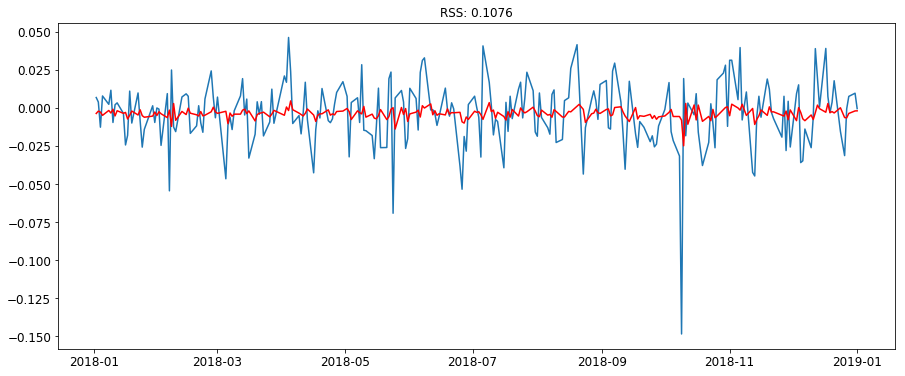

In [96]:
#ARIMA MODEL
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [97]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2018-01-02   -0.003705
2018-01-03   -0.002178
2018-01-04   -0.002807
2018-01-05   -0.004944
2018-01-08   -0.001740
dtype: float64


In [98]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2018-01-02   -0.003705
2018-01-03   -0.005884
2018-01-04   -0.008691
2018-01-05   -0.013635
2018-01-08   -0.015375
dtype: float64


In [99]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2018-01-01    6.064924
2018-01-02    6.061219
2018-01-03    6.059041
2018-01-04    6.056233
2018-01-05    6.051289
dtype: float64

Text(0.5,1,'RMSE: 15.1693')

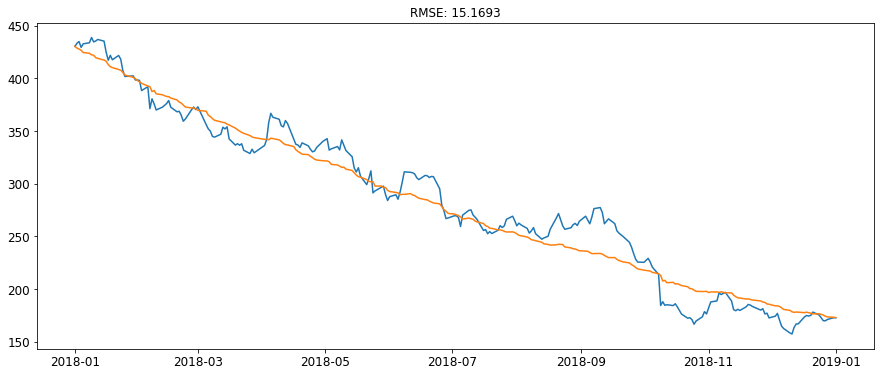

In [100]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

Date
2017-05-04   -0.001575
2017-05-05   -0.005768
2017-05-08   -0.007844
2017-05-09   -0.001457
2017-05-10   -0.000283
dtype: float64
Date
2017-05-04   -0.001575
2017-05-05   -0.007343
2017-05-08   -0.015187
2017-05-09   -0.016644
2017-05-10   -0.016927
dtype: float64


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5,1,'RMSE: 36.5876')

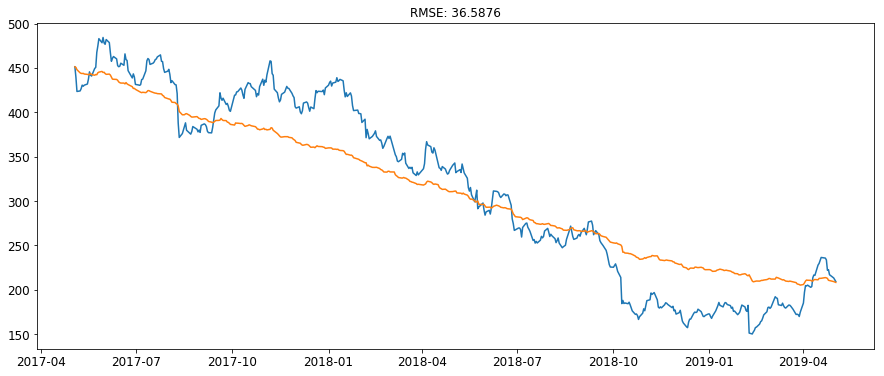

In [72]:
#AR model
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
print (predictions_AR_diff.head())
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print (predictions_AR_diff_cumsum.head())
predictions_AR_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR_log.head()
predictions_AR = np.exp(predictions_AR_log)
plt.plot(ts)
plt.plot(predictions_AR)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_AR-ts)**2)/len(ts)))

Date
2017-05-04   -0.001572
2017-05-05   -0.005730
2017-05-08   -0.007703
2017-05-09   -0.001161
2017-05-10   -0.000067
dtype: float64
Date
2017-05-04   -0.001572
2017-05-05   -0.007302
2017-05-08   -0.015005
2017-05-09   -0.016166
2017-05-10   -0.016233
dtype: float64


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5,1,'RMSE: 37.0492')

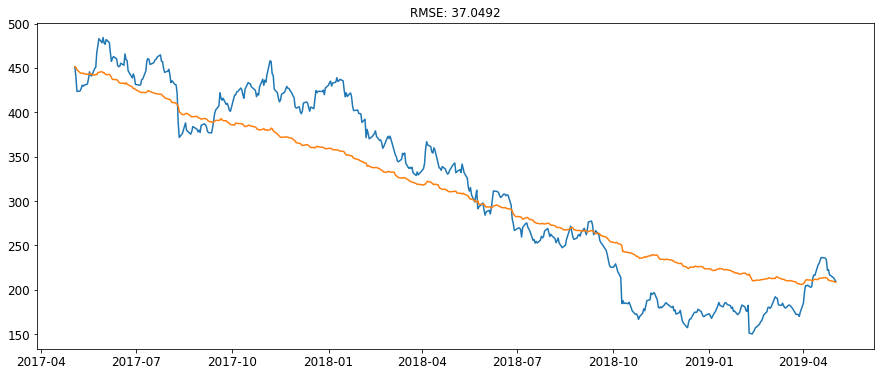

In [73]:
#MA model
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_MA_diff.head())
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print (predictions_MA_diff_cumsum.head())
predictions_MA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()
predictions_MA = np.exp(predictions_MA_log)
plt.plot(ts)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-ts)**2)/len(ts)))

In [142]:
predictions_ARIMA

Date
2018-01-01    430.490000
2018-01-02    428.897797
2018-01-03    427.964634
2018-01-04    426.764882
2018-01-05    424.660260
2018-01-08    423.921803
2018-01-09    422.486763
2018-01-10    422.084066
2018-01-11    419.849384
2018-01-12    419.049373
2018-01-15    417.530400
2018-01-16    416.272980
2018-01-17    413.233645
2018-01-18    411.216878
2018-01-19    410.340744
2018-01-22    408.414029
2018-01-23    407.880590
2018-01-24    405.780878
2018-01-25    403.282056
2018-01-29    401.092305
2018-01-30    399.984347
2018-01-31    397.977532
2018-02-01    396.945413
2018-02-02    395.400716
2018-02-05    392.876117
2018-02-06    392.283695
2018-02-07    387.531475
2018-02-08    388.619923
2018-02-09    385.439097
2018-02-12    384.525525
                 ...    
2018-11-19    190.530376
2018-11-20    190.652435
2018-11-21    190.138603
2018-11-22    189.640617
2018-11-26    188.723619
2018-11-27    187.704901
2018-11-28    187.304072
2018-11-29    185.854283
2018-11-30    185.59